In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches

In [27]:
def graficar_predicciones(new_hours, target, category_limits, variable, yvariable):

  fechas = new_hours
  # Convertir las fechas a objetos datetime
  fechas_datetime = [datetime.strptime(fecha, '%Y/%m/%d %H:%M') for fecha in fechas]
  category_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']   
  colors = ['#9ACA3C', '#F7EC0F', '#F8991F', '#ED2124', '#7D287D', '#7E0023'] 
  colors = colors[0:len(category_limits)-1]
  category_labels = category_labels[0:len(category_limits)-1]
  # Crear el gráfico
  plt.figure(figsize=(10, 6))
  variable = variable +' values'
  # Graficar el target y las predicciones en el eje Y
  plt.plot(fechas_datetime, target, markersize=2, label=variable, marker='o', linewidth=.3)
  #plt.plot(fechas_datetime, predicciones, label='Predicciones', marker='o')
  for limit in category_limits:
      plt.axhline(y=limit, color='gray', linestyle='--', linewidth=0.8)

      
  for i in range(len(category_limits)-1):
    plt.axhspan(category_limits[i], category_limits[i + 1], color=colors[i], alpha=0.6)


  # Configurar formato de fecha en el eje X
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
  category_patches = [mpatches.Patch(color=colors[i], label=category_labels[i]) for i in range(len(colors))]

  # Rotar las fechas para mayor legibilidad
  plt.gcf().autofmt_xdate()

  # Configurar etiquetas y título
  plt.xlabel('Timestamp (date, hour and minute)')
  yvariable ='Pollutant Value (' + yvariable+')'
  plt.ylabel(yvariable)
  title1 = variable + ' and their AQI category'
  plt.title(title1)
  # Mostrar la leyenda
  #plt.legend()
  #plt.legend(handles=category_patches + [plt.Line2D([0], [0], marker='o', color='b', label='Values')])
  plt.legend(handles=category_patches + [plt.Line2D([0], [0], marker='o', label='Values')], loc= 'upper right')
  plt.grid(True)
  # Mostrar el gráfico
  plt.show()

In [41]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
file_path = os.path.join(dir,"air_traffic_MER_15m.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
#df['date'] = pd.to_datetime(df['date'])
df.head()

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,year,month,day,hour,minute,traffic
0,23/02/2024,0.62,2.0,32.0,30.0,110.0,46.0,26.0,7.0,2.0,26.0,293.0,2.1,2024,2,23,14,0,0.90
1,23/02/2024,0.76,2.0,44.0,41.0,125.0,52.0,35.0,4.0,2.0,28.0,276.0,1.8,2024,2,23,15,0,0.78
2,23/02/2024,0.56,1.0,32.0,31.0,133.0,56.0,39.0,2.0,2.0,29.0,39.0,2.1,2024,2,23,16,0,0.98
3,23/02/2024,0.41,0.0,22.0,22.0,127.0,47.0,35.0,0.0,1.0,29.0,46.0,2.0,2024,2,23,17,0,0.75
4,26/02/2024,0.33,2.0,17.0,15.0,55.0,25.0,17.0,6.0,0.0,27.0,56.0,2.3,2024,2,26,14,0,0.77


In [ ]:

#2005/01/01 00:00
#df.loc[:, "datetime"] = str(df['date']) + ' ' + str(df['hour']) + ":" + str(df["minute"])+":00" 
df["datetime"] = df["date"].astype(str)+ " " + df["hour"].astype(str) + ":" +df["minute"].astype(str)
#df["datetime"] = df["datetime"].replace("/", "-")

In [43]:
df.head()

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,year,month,day,hour,minute,traffic,datetime
0,23/02/2024,0.62,2.0,32.0,30.0,110.0,46.0,26.0,7.0,2.0,26.0,293.0,2.1,2024,2,23,14,0,0.90,23/02/2024 14:0
1,23/02/2024,0.76,2.0,44.0,41.0,125.0,52.0,35.0,4.0,2.0,28.0,276.0,1.8,2024,2,23,15,0,0.78,23/02/2024 15:0
2,23/02/2024,0.56,1.0,32.0,31.0,133.0,56.0,39.0,2.0,2.0,29.0,39.0,2.1,2024,2,23,16,0,0.98,23/02/2024 16:0
3,23/02/2024,0.41,0.0,22.0,22.0,127.0,47.0,35.0,0.0,1.0,29.0,46.0,2.0,2024,2,23,17,0,0.75,23/02/2024 17:0
4,26/02/2024,0.33,2.0,17.0,15.0,55.0,25.0,17.0,6.0,0.0,27.0,56.0,2.3,2024,2,26,14,0,0.77,26/02/2024 14:0


ValueError: time data '23/02/2024' does not match format '%Y/%m/%d %H:%M'

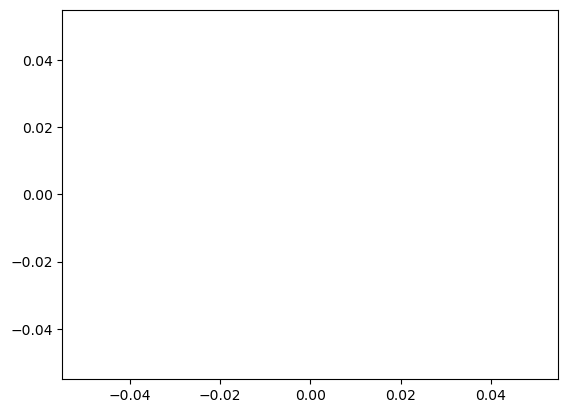

In [31]:
plt.plot()
category_limits = [0, 58, 90, 135, 175, 300]  
graficar_predicciones(df.date, df.O3, category_limits, "O3", "ppm")